# **Visión por Computadora I   -   Trabajo Práctico 3**
## Gustavo Uñapillco      a1624

In [1]:
#Importación de liberías
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.ticker import MultipleLocator

#from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
from PIL import Image
import os 
import time
import copy
import io

Encontrar el logotipo de la gaseosa dentro de las imágenes provistas en Material_TPs/TP3/images a partir del template Material_TPs/TP3/template

Visualizar los resultados con bounding boxes en cada imagen mostrando el nivel de confianza
de la detección.

## Pre-Procesamiento de imágenes

In [2]:
#Primero importamos todas las imágenes 
#La ruta de la carpeta con las imagenes:
carpeta_coca_cola = './images'

Cargamos las imágenes en una lista

In [3]:
#Guardo las imágenes en una lista 
imgs_coca_cola=[]
for archivo in os.listdir(carpeta_coca_cola):
    if archivo.endswith(('.png', '.jpg', '.jpeg')):  # Filtrar por formatos de imagen
        ruta_imagen = os.path.join(carpeta_coca_cola, archivo)
        imgs_coca_cola.append(cv.imread(ruta_imagen,cv.IMREAD_COLOR))

Convertimos las imagenes en RGB y GRAY

In [4]:
#Convierto las imágenes en RGB, GRAY (escala de grises) y Laplaciano
imgs_coca_cola_rgb = []
imgs_coca_cola_gray = []

for i in range(len(imgs_coca_cola)): 
    imgs_coca_cola_rgb.append(cv.cvtColor(imgs_coca_cola[i], cv.COLOR_BGR2RGB))
    imgs_coca_cola_gray.append(cv.cvtColor(imgs_coca_cola[i], cv.COLOR_BGR2GRAY))

Visualizamos las imágenes

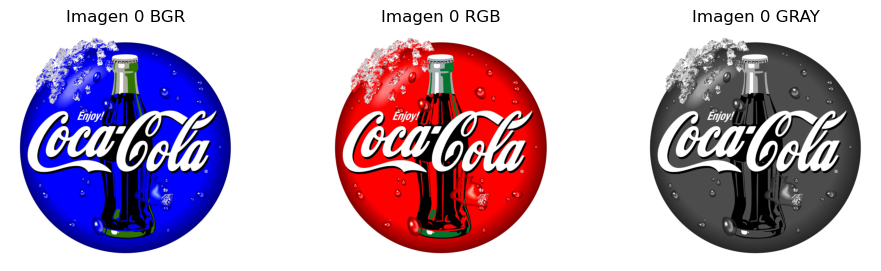

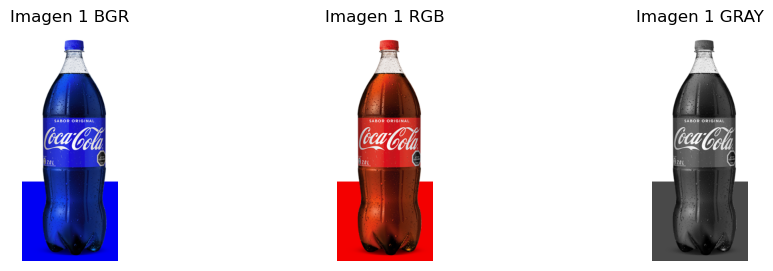

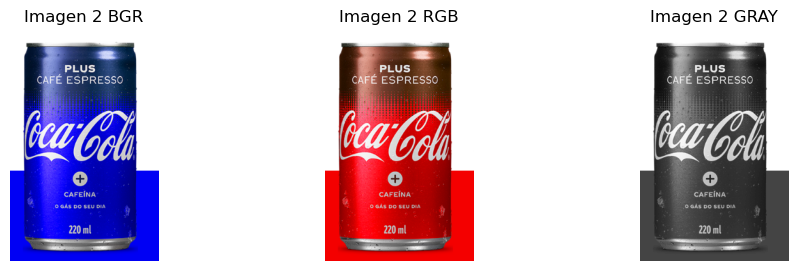

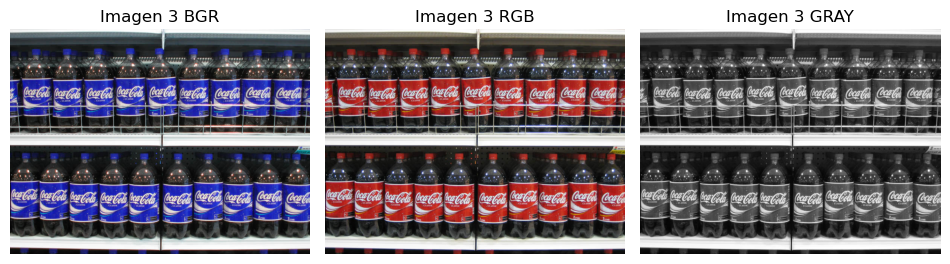

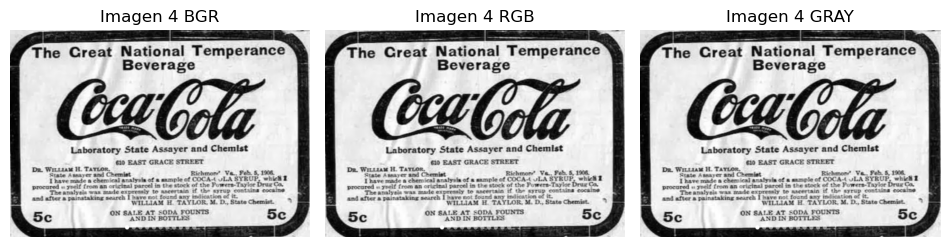

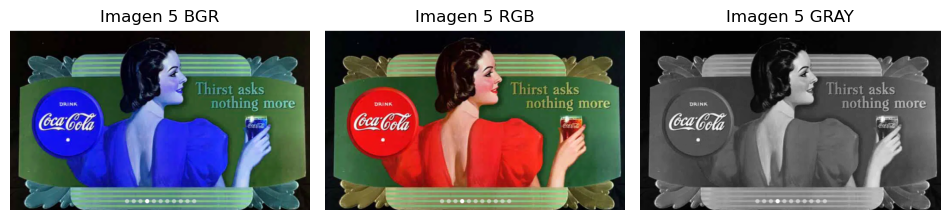

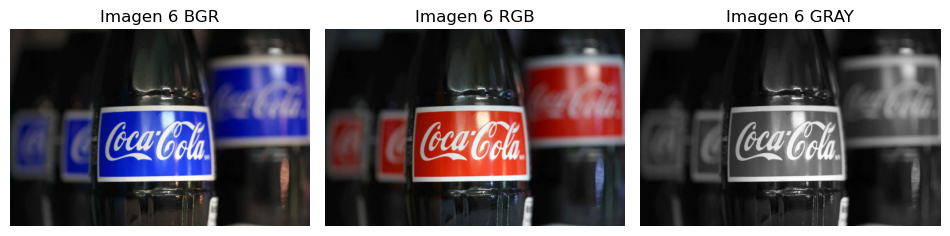

In [5]:
#Ciclo for para imprimir todas las imagenes 

for i in range(len(imgs_coca_cola)):

    # Crear una figura con 1 fila y 4 columnas
    fig, axs = plt.subplots(1, 3, figsize=(12, 3))  # Ajustar el tamaño según sea necesario
    # Ajustar los gráficos para que se autoescale
    plt.subplots_adjust(wspace=0.05, hspace=0.05)
    plt.subplot(1,3,1), plt.imshow(imgs_coca_cola[i]), plt.title(f'Imagen {i} BGR'), plt.axis('off')        #plt.xticks([]), plt.yticks([])
    plt.subplot(1,3,2), plt.imshow(imgs_coca_cola_rgb[i]), plt.title(f'Imagen {i} RGB'), plt.axis('off')    #plt.xticks([]), plt.yticks([])
    plt.subplot(1,3,3), plt.imshow(imgs_coca_cola_gray[i], cmap='gray'), plt.title(f'Imagen {i} GRAY'), plt.axis('off') #plt.xticks([]), plt.yticks([])
    plt.show()

En este punto decidimos aplicar la detección de bordes de Canny a nuestras imágenes


In [6]:
#Aplicación de Canny a imágenes
imgs_coca_cola_canny = []
sigma = 0.3  # Factor ajustable
for img in imgs_coca_cola_gray:
    blurred_img = cv.GaussianBlur(img, (5, 5), 1.4)
    v = np.median(blurred_img)
    threshold1 = int(max(0, (1.0 - sigma) * v))
    threshold2 = int(min(255, (1.0 + sigma) * v))
    imgs_coca_cola_canny.append(cv.Canny(blurred_img, threshold1, threshold2))

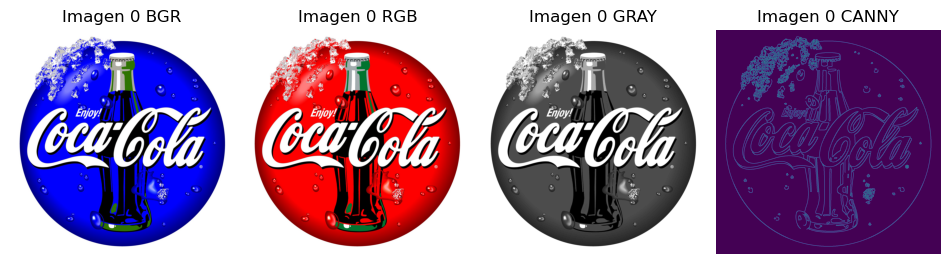

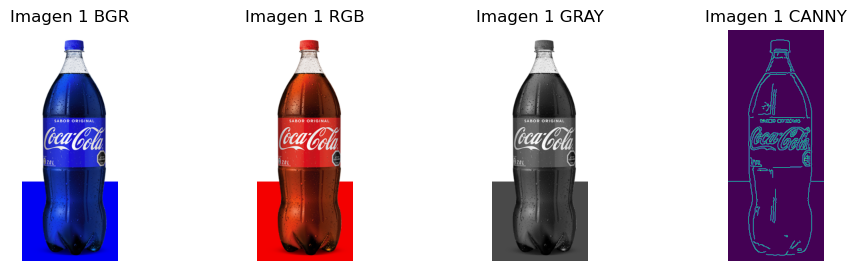

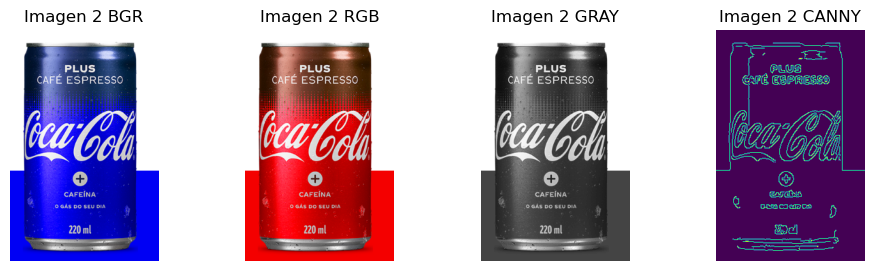

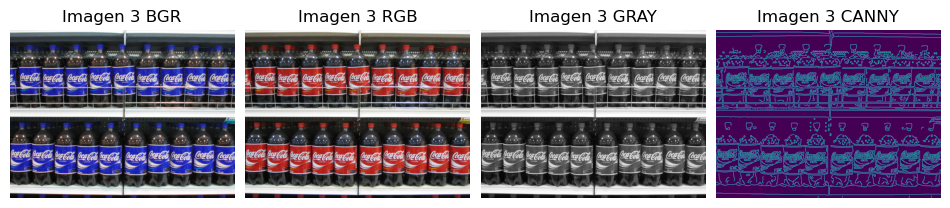

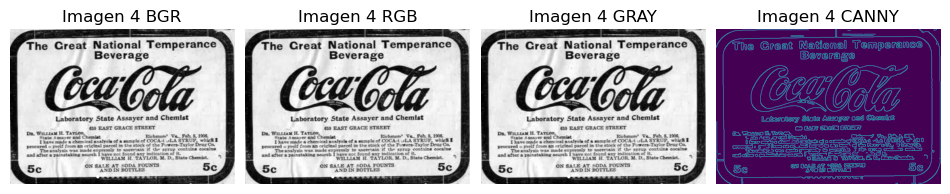

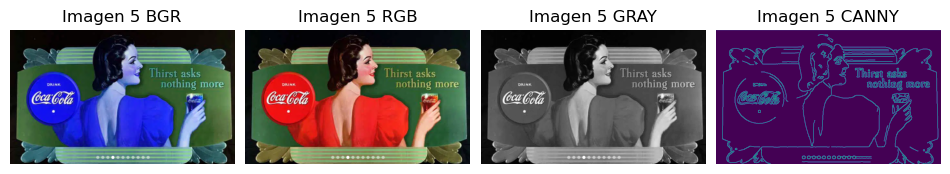

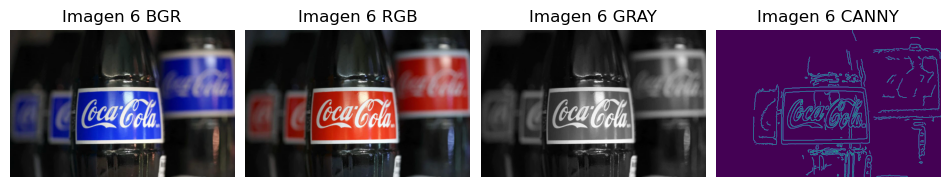

In [7]:
#Ciclo for para imprimir todas las imagenes 
for i in range(0, len(imgs_coca_cola)):
    # Crear una figura con 1 fila y 4 columnas
    fig, axs = plt.subplots(1, 4, figsize=(12, 3))  # Ajustar el tamaño según sea necesario
    # Ajustar los gráficos para que se autoescale
    plt.subplots_adjust(wspace=0.05, hspace=0.05)
    plt.subplot(1,4,1), plt.imshow(imgs_coca_cola[i]), plt.title(f'Imagen {i} BGR'), plt.axis('off') 
    plt.subplot(1,4,2), plt.imshow(imgs_coca_cola_rgb[i]), plt.title(f'Imagen {i} RGB'),  plt.axis('off') 
    plt.subplot(1,4,3), plt.imshow(imgs_coca_cola_gray[i], cmap='gray'), plt.title(f'Imagen {i} GRAY'), plt.axis('off') 
    plt.subplot(1,4,4), plt.imshow(imgs_coca_cola_canny[i]), plt.title(f'Imagen {i} CANNY'), plt.axis('off') 
    plt.show()

Cargamos el template


In [8]:
#La ruta deL template:
carpeta_template = './template'
#Cargo el template:
template = cv.imread('./template/pattern.png',cv.IMREAD_COLOR)
#Lo convierto a RGB  y GRAY 
template_rgb= cv.cvtColor(template, cv.COLOR_BGR2RGB)
template_gray= cv.cvtColor(template, cv.COLOR_BGR2GRAY)

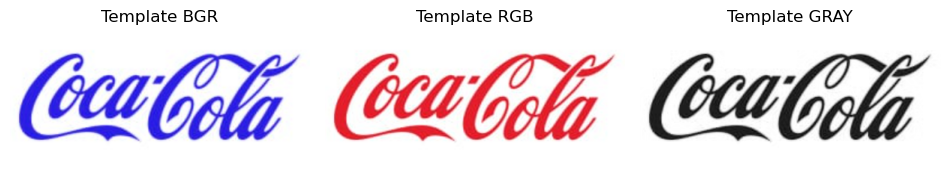

In [9]:
# Crear una figura con 1 fila y 3 columnas
fig, axs = plt.subplots(1, 3, figsize=(12, 3))  # Ajustar el tamaño según sea necesario
# Ajustar los gráficos para que se autoescale
plt.subplots_adjust(wspace=0.05, hspace=0.05)
plt.subplot(1,3,1), plt.imshow(template), plt.title('Template BGR'), plt.axis('off') #plt.xticks([]), plt.yticks([])
plt.subplot(1,3,2), plt.imshow(template_rgb), plt.title('Template RGB'), plt.axis('off') #plt.xticks([]), plt.yticks([])
plt.subplot(1,3,3), plt.imshow(template_gray, cmap='gray'), plt.title('Template GRAY'), plt.axis('off') #plt.xticks([]), plt.yticks([])
plt.show()

Aplicamos detección de bordes de Canny a nuestro template: 

In [10]:
#Detección de Canny a Template 
sigma_tmp = 0.3  # Factor ajustable
blurred_tmp = cv.GaussianBlur(template_gray, (5, 5), 1.4) 
v_tmp = np.median(blurred_tmp)
threshold1_tmp = int(max(0, (1.0 - sigma_tmp) * v_tmp))
threshold2_tmp = int(min(255, (1.0 + sigma_tmp) * v_tmp))
template_canny = cv.Canny(blurred_tmp, threshold1_tmp, threshold2_tmp)

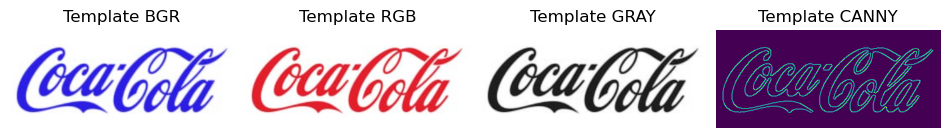

In [11]:
# Crear una figura con 1 fila y 3 columnas
fig, axs = plt.subplots(1, 4, figsize=(12, 3))  # Ajustar el tamaño según sea necesario
# Ajustar los gráficos para que se autoescale
plt.subplots_adjust(wspace=0.05, hspace=0.05)
plt.subplot(1,4,1), plt.imshow(template), plt.title('Template BGR'), plt.axis('off') #plt.xticks([]), plt.yticks([])
plt.subplot(1,4,2), plt.imshow(template_rgb), plt.title('Template RGB'), plt.axis('off') #plt.xticks([]), plt.yticks([])
plt.subplot(1,4,3), plt.imshow(template_gray, cmap='gray'), plt.title('Template GRAY'), plt.axis('off') #plt.xticks([]), plt.yticks([])
plt.subplot(1,4,4), plt.imshow(template_canny), plt.title('Template CANNY'), plt.axis('off') #plt.xticks([]), plt.yticks([])

plt.show()

Analicemos el tamaño del template y del logo:

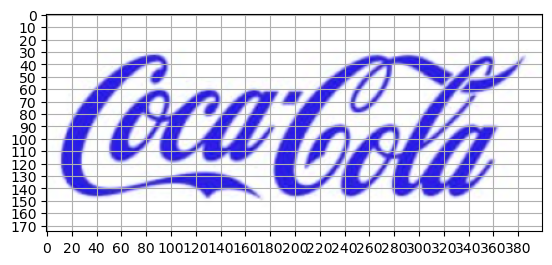

In [12]:
#Imprimir Template
plt.imshow(template)
plt.grid(True)
plt.gca().xaxis.set_major_locator(MultipleLocator(20))  # Eje X con valores de 50 en 50
plt.gca().yaxis.set_major_locator(MultipleLocator(10))

In [13]:
#Análisis de Template

x_inicial = 10
x_final = 385
y_inicial = 33
y_final = 145
dim_logo_template = (y_final - y_inicial, x_final - x_inicial)
#print(dim_logo_template) #(112, 375)

print(f'Las dimensiones del template son: \n\t Alto (Y):\t{template.shape[0]}\n\tAncho (X):\t{template.shape[1]}\n')

print(f'Las dimensiones del logo dentro del template son: \n\t Alto (Y):\t{dim_logo_template[0]}\n\tAncho (X):\t{dim_logo_template[1]}')

Las dimensiones del template son: 
	 Alto (Y):	175
	Ancho (X):	400

Las dimensiones del logo dentro del template son: 
	 Alto (Y):	112
	Ancho (X):	375


Las imagenes tienen diferentes dimensiones así que tendremos que ir ajustando las dimensiones del template de acuerdo a cada imagen: 

In [14]:
#For para imprimir el shape de las imagenes 

for i, img in enumerate(imgs_coca_cola):
    print(f'Dimension de imagen {i} es {img.shape} ')

Dimension de imagen 0 es (1389, 1389, 3) 
Dimension de imagen 1 es (500, 207, 3) 
Dimension de imagen 2 es (363, 233, 3) 
Dimension de imagen 3 es (598, 799, 3) 
Dimension de imagen 4 es (493, 715, 3) 
Dimension de imagen 5 es (429, 715, 3) 
Dimension de imagen 6 es (450, 687, 3) 


## Funciones

In [15]:
methods = ['cv.TM_CCOEFF_NORMED', 'cv.TM_CCORR_NORMED']

In [16]:
def deteccion (template, img_rgb, img_gray):
    w_tmp, h_tmp = template.shape[::-1]
    w_img_g, h_img_g = img_gray.shape[::-1]
    meth_metricas = []
    for meth in methods:
        method = eval(meth)

        if w_img_g > w_tmp and h_img_g > h_tmp:
            res = cv.matchTemplate(img_gray, template, method)    
            meth_metricas.append(cv.minMaxLoc(res))
   
    return meth_metricas

In [17]:
#Le pasamos las cordeenadas aproximadas del logo en la imagen original, calcula la dimensión y a partir de allí escala el template.  

def escalado_template (x_inicial, x_final, y_inicial, y_final):
    #Alto del logo en el template dim_logo_template[0]
    #Ancho del logo en el template dim_logo_template[0]
    alto_logo_template = dim_logo_template[0] #112
    ancho_logo_template = dim_logo_template[1] #375
   
    alto_logo_imagen = y_final - y_inicial
    #print(alto_logo_imagen)
    ancho_logo_imagen = x_final - x_inicial
    #print(ancho_logo_imagen)
    rate_altura = alto_logo_imagen/alto_logo_template
    rate_ancho = ancho_logo_imagen/ancho_logo_template

    #print(rate_altura)
    #print(rate_ancho)
    #Buscamos el máximo:
    esc_max = max(rate_altura,rate_ancho) + 0.1
    esc_min = min(rate_altura,rate_ancho) - 0.1
    valores_esc = np.round(np.linspace(esc_min, esc_max, 10),3)

    #print(valores_esc)

    temp_resized_canny = []

    for i in range(len(valores_esc)):
        temp_resized_canny.append(cv.resize(template_canny, (0, 0), fx=valores_esc[i], fy=valores_esc[i]))

    #Para observar el shape del template con cada escala.
    #for i in range(len(valores_esc)):
    #    print(f'{i} Scale: {valores_esc[i]} the shape template is {temp_resized_canny[i].shape}')

    return temp_resized_canny

In [18]:
def deteccion_print (template, img_rgb, max_loc):
    w_tmp, h_tmp = template.shape[::-1]
    img_salida = img_rgb.copy()
    top_left = max_loc
    # Marcamos el lugar donde lo haya encontrado
    #----------------------------------------
    bottom_right = (top_left[0] + w_tmp, top_left[1] + h_tmp)
    cv.rectangle(img_salida,top_left, bottom_right, (0,0,255), 4)
    plt.imshow(img_salida), plt.axis('off') 
    plt.show()

La función 
```python 
def max_val (metricas, imprimir=True):
``` 
Me devolverá el valor máximo de detección que debería ser el más cerca uno


In [19]:
def max_val (metricas, imprimir=True):
    max_val_TM_CCOEFF_NORMED_ls=[]
    max_val_TM_CCORR_NORMED_ls=[]
    for i in range(0, len(metricas)):
        max_val_TM_CCOEFF_NORMED_ls.append(metricas[i][0][1])      
        max_val_TM_CCORR_NORMED_ls.append(metricas[i][1][1])
        #print(f'{i}\t{metricas[i][0][1]}\t{metricas[i][1][1]}')
    max_val_TM_CCOEFF_NORMED_ls[0]=0
    max_val_TM_CCORR_NORMED_ls[0]=0

    #print(max_val_TM_CCOEFF_NORMED_ls)
    #print(max_val_TM_CCORR_NORMED_ls)

    #Buscamos el máximo cada arreglo y su indice 
    max_val_TM_CCOEFF_NORMED = max(max_val_TM_CCOEFF_NORMED_ls)
    idx_max_val_TM_CCOEFF_NORMED = max_val_TM_CCOEFF_NORMED_ls.index(max_val_TM_CCOEFF_NORMED)
    #print(max_val_TM_CCOEFF_NORMED, idx_max_val_TM_CCOEFF_NORMED)

    max_val_TM_CCORR_NORMED = max(max_val_TM_CCORR_NORMED_ls)
    idx_max_val_TM_CCORR_NORMED = max_val_TM_CCORR_NORMED_ls.index(max_val_TM_CCORR_NORMED)
    #print( max_val_TM_CCORR_NORMED,  idx_max_val_TM_CCORR_NORMED)
    if max_val_TM_CCOEFF_NORMED > max_val_TM_CCORR_NORMED:
        idx_max = idx_max_val_TM_CCOEFF_NORMED
        idx_meth = 0
        val_max = max_val_TM_CCORR_NORMED
    elif max_val_TM_CCOEFF_NORMED < max_val_TM_CCORR_NORMED: 
        idx_max = idx_max_val_TM_CCORR_NORMED
        idx_meth = 1
        val_max = max_val_TM_CCORR_NORMED
    
    if imprimir==True:
        print (f'El template que mejor se ajuste es el template {idx_max} con el método {methods[idx_meth]} con un valor máximo {val_max}')
    
    max_loc = metricas[idx_max][idx_meth][3]

    return max_loc, idx_max, val_max


In [20]:
#def deteccion_logo (indice_img, x_ini, x_fin, y_ini, y_fin):
#    temp_resized_canny=escalado_template(x_ini, x_fin, y_ini, y_fin)
    
def deteccion_logo (indice_img, coord):
    temp_resized_canny=escalado_template(coord[0],coord[1],coord[2],coord[3])
        
    
    metricas = []
    for i in range(0,len(temp_resized_canny)):
        metricas.append(deteccion (temp_resized_canny[i], imgs_coca_cola_rgb[indice_img], imgs_coca_cola_canny[indice_img]))

    #Filtramos por si quedo algún espacio vacío
    metricas = [x for x in metricas if x] 
    max_loc, idx_max, val_max = max_val(metricas)
    deteccion_print(temp_resized_canny[idx_max],imgs_coca_cola_rgb[indice_img],max_loc)
    return val_max
       

In [21]:
def umbral_multi (indice_img, x_ini, x_fin, y_ini, y_fin):
    temp_resized_canny=escalado_template(x_ini, x_fin, y_ini, y_fin)
    metricas = []
    for i in range(0,len(temp_resized_canny)):
        metricas.append(deteccion (temp_resized_canny[i], imgs_coca_cola_rgb[indice_img], imgs_coca_cola_canny[indice_img]))

    #Filtramos por si quedo algún espacio vacío
    metricas = [x for x in metricas if x] 
    max_loc, idx_max, val_max = max_val(metricas, False)
    return max_loc, idx_max, val_max

In [22]:
#Esta función nos mostrará la imagen con el grid activado.

def print_grid (idx) :
    plt.imshow(imgs_coca_cola[idx])
    plt.grid(True)
    plt.gca().xaxis.set_major_locator(MultipleLocator(50))  
    plt.gca().yaxis.set_major_locator(MultipleLocator(50))
    plt.gca().tick_params(axis='x', labelsize=8, rotation = 90)  # Cambia el tamaño de las etiquetas del eje X
    plt.gca().tick_params(axis='y', labelsize=8, rotation = 0) 
    plt.show()

## **Parte 1** : Obtener una detección del logo en cada imagen sin falsos positivos

### Imagen 0

Primero analicemos el tamaño del logo dentro de la imagen:

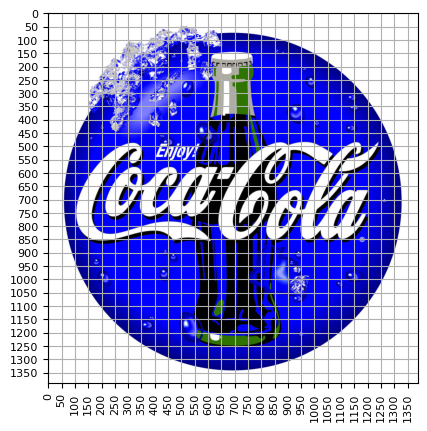

In [23]:
print_grid (0) 

**OJO: SOLO LE PASAMOS LAS COORDENADAS DEL LOGO PARA SOLO PARA QUE CALCULE EL TAMAÑO AL QUE DEBE ESCALAR EL TEMPLATE**

El template que mejor se ajuste es el template 9 con el método cv.TM_CCORR_NORMED con un valor máximo 0.12059671431779861


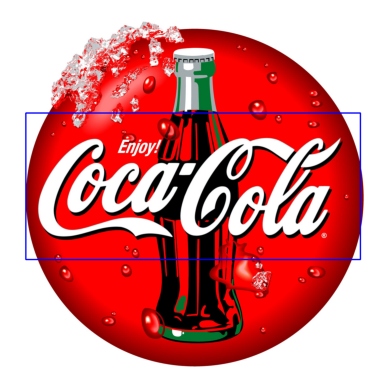

In [24]:

logo_0 = [100,1240,590,860]
max_val_0=deteccion_logo(0, logo_0)

### Imagen 1

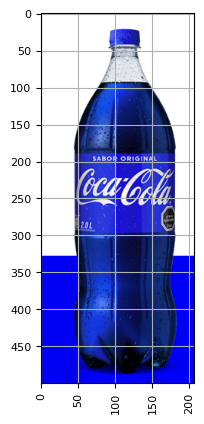

In [25]:
print_grid (1)

El template que mejor se ajuste es el template 6 con el método cv.TM_CCORR_NORMED con un valor máximo 0.30108752846717834


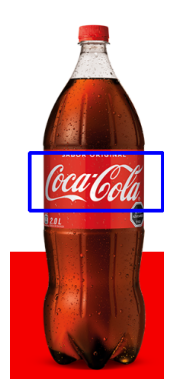

In [26]:
logo_1 = [50,180,210,260]
max_val_1=deteccion_logo(1, logo_1)

### Imagen 2

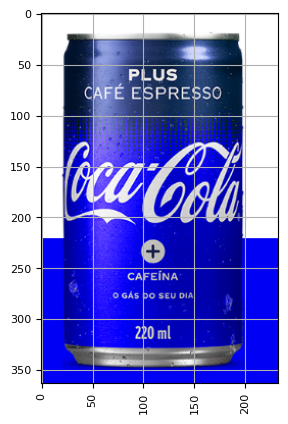

In [27]:
print_grid (2)

El template que mejor se ajuste es el template 2 con el método cv.TM_CCORR_NORMED con un valor máximo 0.1967867761850357


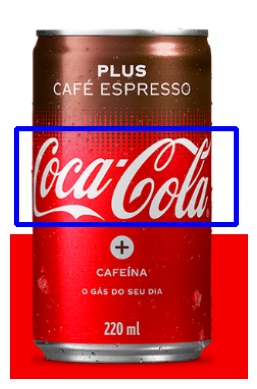

In [28]:
logo_2 = [10,200,120,220]
max_val_2=deteccion_logo(2, logo_2)

### Imagen 4

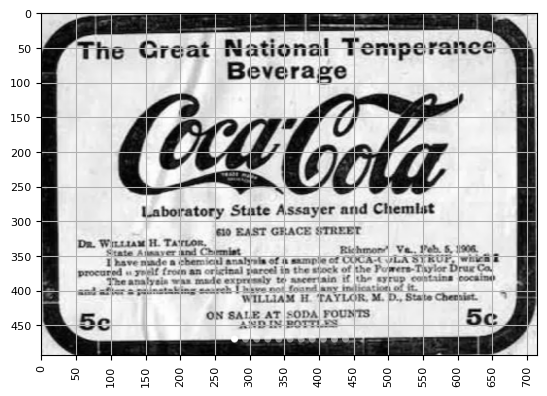

In [29]:
print_grid (4)

El template que mejor se ajuste es el template 2 con el método cv.TM_CCORR_NORMED con un valor máximo 0.17519579827785492


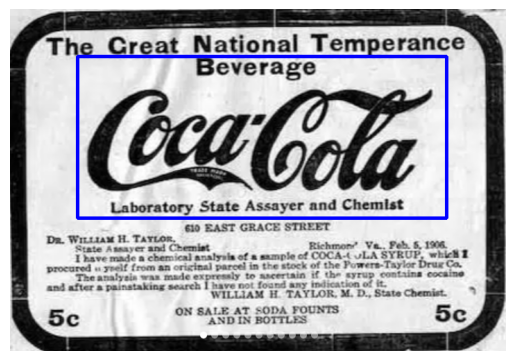

In [30]:
logo_4 = [100,620,110,265]
max_val_4=deteccion_logo(4, logo_4)

### Imagen 5

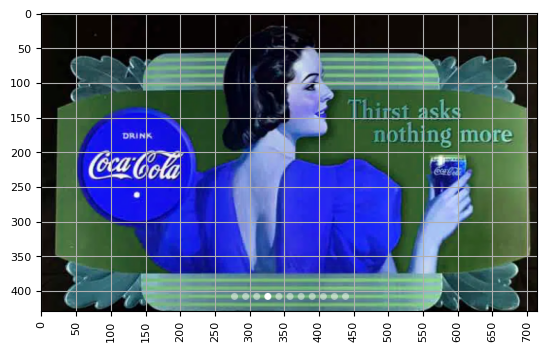

In [31]:
print_grid (5)

El template que mejor se ajuste es el template 4 con el método cv.TM_CCORR_NORMED con un valor máximo 0.3054540753364563


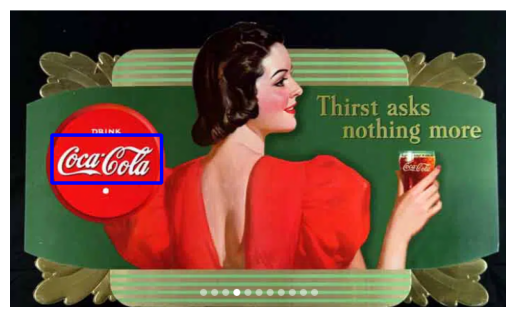

In [32]:
logo_5 = [70,210,190,240]
max_val_5=deteccion_logo(5, logo_5)


### Imagen 6

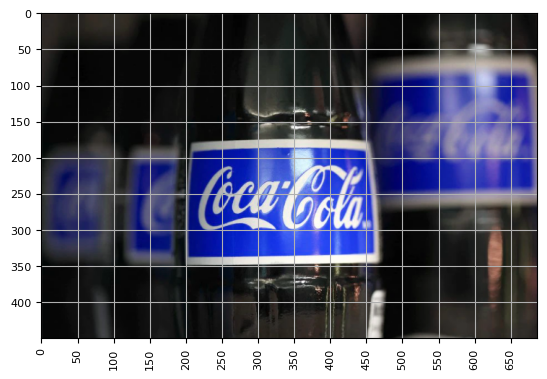

In [33]:
print_grid (6)

El template que mejor se ajuste es el template 5 con el método cv.TM_CCORR_NORMED con un valor máximo 0.21819281578063965


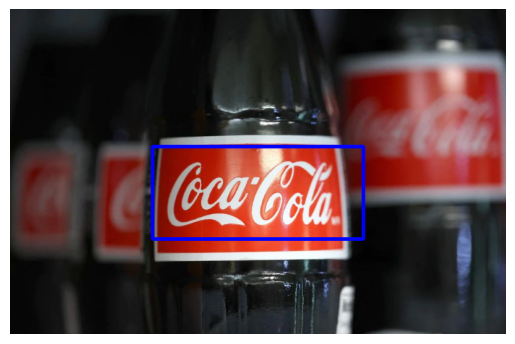

In [34]:
logo_6 = [220,450,210,300]
max_val_6=deteccion_logo(6, logo_6)

## **Parte 2** : Plantear y validar un algoritmo para múltiples detecciones en la imagen coca_multi.png con el mismo témplate del ítem 1

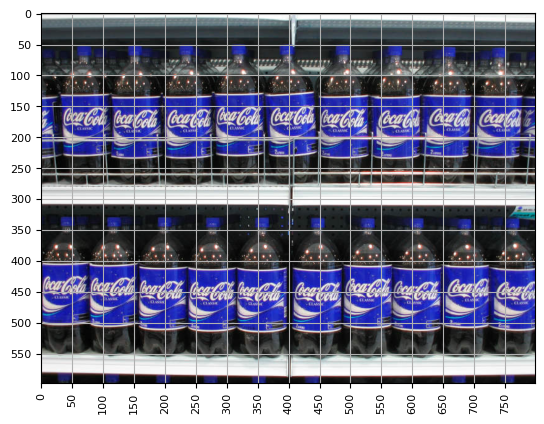

In [35]:
print_grid(3)

El template que mejor se ajuste es el template 2 con el método cv.TM_CCORR_NORMED con un valor máximo 0.2568244934082031


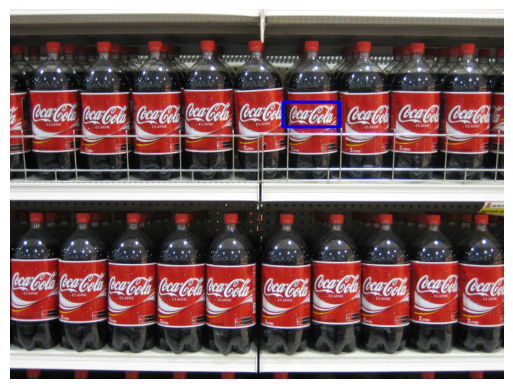

In [36]:
logo_3 = [20, 120, 140, 180]
max_val_3=deteccion_logo(3, logo_3)

In [37]:
def deteccion_multiple (indice_imagen, coord):
    
    max_loc, idx_max, val_max = umbral_multi(indice_imagen, coord[0], coord[1], coord[2], coord[3])
    resize=escalado_template(coord[0], coord[1], coord[2], coord[3])
    template_multiple = resize[idx_max]
    w, h = template_multiple.shape[::-1]
    res = cv.matchTemplate(imgs_coca_cola_canny[indice_imagen],template_multiple,cv.TM_CCORR_NORMED)
      
    threshold = val_max-(0.15*(val_max))#0.035
    
    img_multiple = imgs_coca_cola_rgb[indice_imagen].copy()
    loc = np.where( res >= threshold)
    for pt in zip(*loc[::-1]):
        cv.rectangle(img_multiple, pt, (pt[0] + w, pt[1] + h), (0,0,255), 1)
    plt.imshow(img_multiple)   



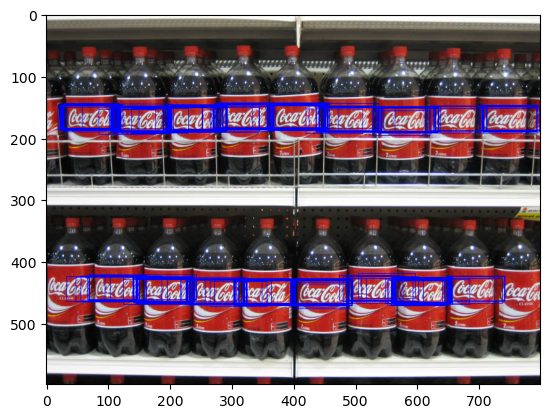

In [38]:
deteccion_multiple (3, logo_3)


## **Parte 3** : Generalizar el algoritmo del item 2 para todas las imágenes.

Con la función :
```python
def deteccion_multiple () 
```
Generalicé el algoritmo para todos las imágenes


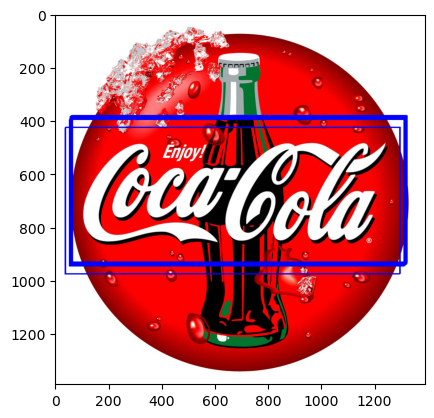

In [39]:
deteccion_multiple (0,logo_0)

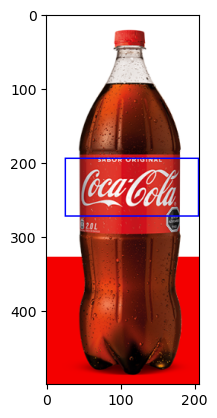

In [40]:
deteccion_multiple (1,logo_1)

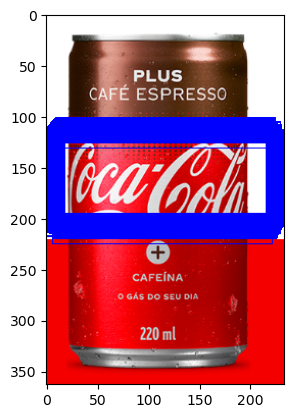

In [41]:
deteccion_multiple (2,logo_2)

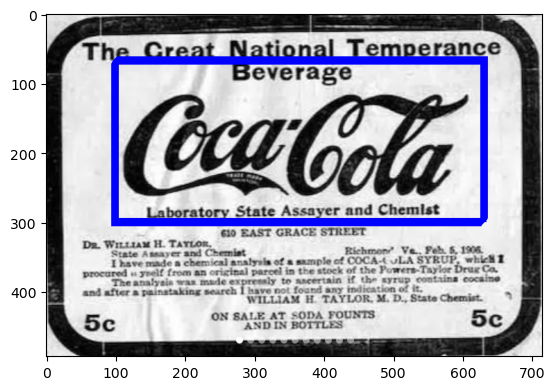

In [42]:
deteccion_multiple (4,logo_4)

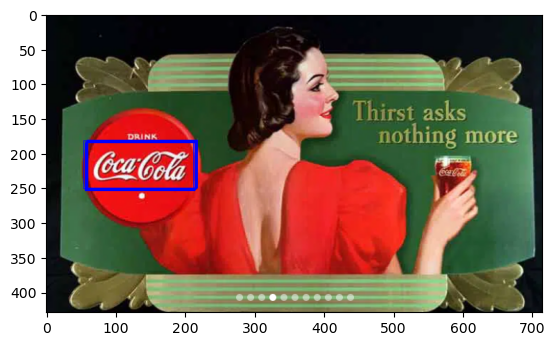

In [43]:
deteccion_multiple (5,logo_5)

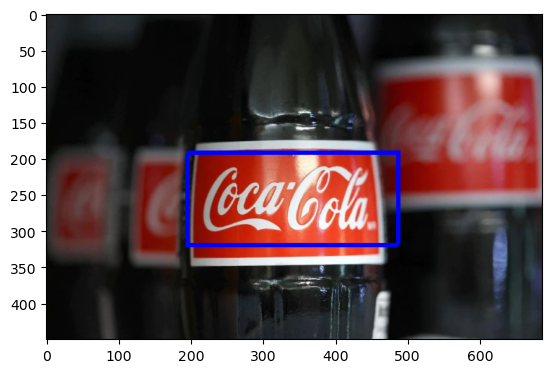

In [44]:
deteccion_multiple (6,logo_6)